# Projet 07 : Effectuer une prédiction de revenus

---
**Importation des librairies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.colors as plc
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import modules_perso.sf_graphiques as sfg

---
## <font color=blue>Mission 4 : Modélisation du revenu des individus</font>

### 4.6. ANOVA du revenu basée sur le revenu moyen et l'indice de Gini du pays, et sur la classe de revenu des parents

In [4]:
data = pd.read_csv("data_analyse05.csv", index_col=0)
data.head()

C:\Anaconda3\envs\Jupyter\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,child_income,revenu_moyen,gini_from_centiles,parent_centile
0,728.89795,2994.829902,32.141019,1
1,728.89795,2994.829902,32.141019,1
2,728.89795,2994.829902,32.141019,1
3,728.89795,2994.829902,32.141019,1
4,728.89795,2994.829902,32.141019,1


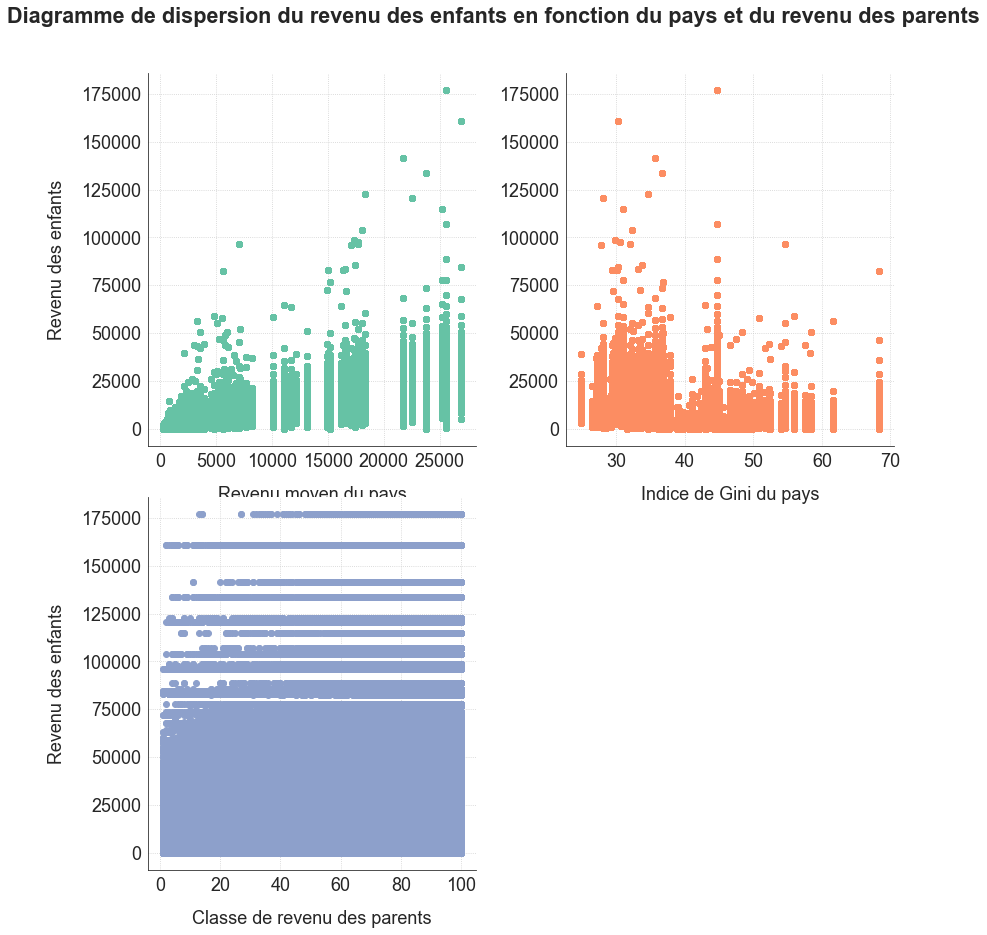

In [5]:
mygraph = sfg.MyGraph("Diagramme de dispersion du revenu des enfants en fonction du pays et du revenu des parents", nblin=2, nbcol=2, is_mono=False, figsize=(12,12))
mygraph.add_plot(data.revenu_moyen, data.child_income, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(data.gini_from_centiles, data.child_income, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[1], markerfacecolor=mygraph.liste_couleurs[1], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(data.parent_centile, data.child_income, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=3)
mygraph.set_axe('x', label="Revenu moyen du pays", multi_index=1)
mygraph.set_axe('x', label="Indice de Gini du pays", multi_index=2)
mygraph.set_axe('x', label="Classe de revenu des parents", multi_index=3)
mygraph.set_axe('y', label="Revenu des enfants", multi_index=1)
mygraph.set_axe('y', label="Revenu des enfants", multi_index=3)
mygraph.ax[3].set_visible(False)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova05b_00_diagramme_dispersion.png")
plt.show()

Encore une fois, la dispersion des nuages de points laisse présager d'un manque de linéarité de la relation si l'on ne prend pas le logarithme des revenus. Vérifions les hypothèses du modèle.

In [6]:
anova = smf.ols(formula="child_income ~ revenu_moyen + gini_from_centiles + C(parent_centile)", data=data).fit()

In [7]:
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           child_income   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                 6.140e+04
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:07:49   Log-Likelihood:            -5.7593e+07
No. Observations:             5642420   AIC:                         1.152e+08
Df Residuals:                 5642318   BIC:                         1.152e+08
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -2861.8631     31.184    -91.772      0.000   -2922.983   -2800.743
C(parent_centile)[T.2]     338.3173     39.123      8.647      0.000     261.637     414.998
C(parent_centile)[T.3]     519.3566     39.117     13.277      0.000     442.689     596.024
C(parent_centile)[T.4]     644.2982     39.098     16.479      0.000     567.668     720.928
C(parent_centile)[T.5]     748.7232     39.099     19.149      0.000     672.090     825.357
C(parent_centile)[T.6]     823.3694     39.101     21.057      0.000     746.732     900.007
C(parent_centile)[T.7]     892.3792     39.081     22.834      0.000     815.781     968.977
C(parent_centile)[T.8]     941.2883     39.094     24.078      0.000     864.665    1017.911
C(parent_centile)[T.9]     995.8267     39.087     25.477      0.000     919.217    1072.436
C(parent_centile)[T.10]   1066.7206     39.097     27.284      0.000     990.093    1143.349
C(parent_centile)[T.11]   1130.1782     39.082     28.918      0.000    1053.579    1206.777
C(parent_centile)[T.12]   1158.3352     39.090     29.632      0.000    1081.720    1234.951
C(parent_centile)[T.13]   1219.9067     39.094     31.204      0.000    1143.283    1296.530
C(parent_centile)[T.14]   1286.1795     39.087     32.905      0.000    1209.569    1362.790
C(parent_centile)[T.15]   1315.6392     39.095     33.653      0.000    1239.015    1392.263
C(parent_centile)[T.16]   1364.5037     39.079     34.917      0.000    1287.911    1441.096
C(parent_centile)[T.17]   1384.2065     39.089     35.412      0.000    1307.594    1460.819
C(parent_centile)[T.18]   1450.1270     39.076     37.111      0.000    1373.540    1526.714
C(parent_centile)[T.19]   1476.3877     39.083     37.776      0.000    1399.787    1552.989
C(parent_centile)[T.20]   1516.9946     39.070     38.827      0.000    1440.418    1593.571
C(parent_centile)[T.21]   1566.3279     39.079     40.082      0.000    1489.735    1642.920
C(parent_centile)[T.22]   1594.6653     39.090     40.795      0.000    1518.051    1671.280
C(parent_centile)[T.23]   1627.3485     39.076     41.646      0.000    1550.762    1703.935
C(parent_centile)[T.24]   1668.5744     39.077     42.699      0.000    1591.984    1745.165
C(parent_centile)[T.25]   1692.4499     39.093     43.293      0.000    1615.829    1769.071
C(parent_centile)[T.26]   1754.8003     39.080     44.903      0.000    1678.206    1831.395
C(parent_centile)[T.27]   1766.9796     39.078     45.217      0.000    1690.388    1843.571
C(parent_centile)[T.28]   1791.9957     39.075     45.861      0.000    1715.411    1868.581
C(parent_centile)[T.29]   1882.4470     39.077     48.172      0.000    1805.857    1959.037
C(parent_centile)[T.30]   1887.5009     39.079     48.300      0.000    1810.908    1964.094
C(parent_centi

In [8]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

,sum_sq,df,F,PR(>F),eta_squared,omega_squared
C(parent_centile),1.526631e+13,99.0,3.587776e+03,0.000000,3.211992e-02,3.210237e-02
revenu_moyen,2.175139e+14,1.0,5.060733e+06,0.000000,4.576436e-01,4.576433e-01
gini_from_centiles,1.494720e+07,1.0,3.477653e-01,0.555381,3.144851e-08,-1.457804e-07
Residual,2.425109e+14,5642318.0,NaN,NaN,NaN,NaN
total,4.752911e+14,5642419.0,NaN,NaN,NaN,NaN


L'ajout de la classe des revenus des parents augmente la part de dispersion expliquée par le modèle. L'ANOVA conclut à la significativé des variables revenu moyen du pays et classe de revenu des parents. Par contre, l'indice de Gini devient non significatif avec l'ajout de la classe de revenu des parents.  
Mais avant d'aller plus avant, il faut vérifier le respect des hypothèses.

### Vérification des hypothèses

**Hypothèse 1 : Normalité des résidus**

In [9]:
alpha_normalite = 0.05
ad_stat, ad_pvalue = sm.stats.normal_ad(anova.resid)
norm_stat, norm_pvalue = st.kstest(anova.resid, cdf='norm', args=(anova.resid.mean(), anova.resid.var(ddof=1)))
jb_stat, jb_pvalue, skw, kurt = sm.stats.stattools.jarque_bera(anova.resid)
df_normalite = pd.DataFrame({'H0':np.repeat("Distribution normale",3), 'Statistique':["{:.2f}".format(ad_stat),"{:.2f}".format(norm_stat),"{:.2f}".format(jb_stat)], \
                             'p-value':["{:.3f}".format(ad_pvalue),"{:.3f}".format(norm_pvalue),"{:.3f}".format(jb_pvalue)]}, index=["Anderson-Darling","Kolmogorov-Smirnov","Jarque-Bera"])
inter_col = "Résultat (seuil={:.1%})".format(alpha_normalite)
df_normalite[inter_col] = ["Normalité acceptée" if float(pval)>=alpha_normalite else "Normalité rejetée" for pval in df_normalite["p-value"]]
df_normalite

C:\Anaconda3\envs\Jupyter\lib\site-packages\statsmodels\stats\_adnorm.py:66: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)
C:\Anaconda3\envs\Jupyter\lib\site-packages\statsmodels\stats\_adnorm.py:66: RuntimeWarning: divide by zero encountered in log
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


,H0,Statistique,p-value,Résultat (seuil=5.0%)
Anderson-Darling,Distribution normale,inf,0.000,Normalité rejetée
Kolmogorov-Smirnov,Distribution normale,0.50,0.000,Normalité rejetée
Jarque-Bera,Distribution normale,2162148112.89,0.000,Normalité rejetée


Aucun des trois test n'accepte la normalité. Nous avons un grand nombre d'observations. Une symétrie de la distribution des résidus sera suffisante. Je vérifie graphiquement cette symétrie, et je trace également la droite de Henry.

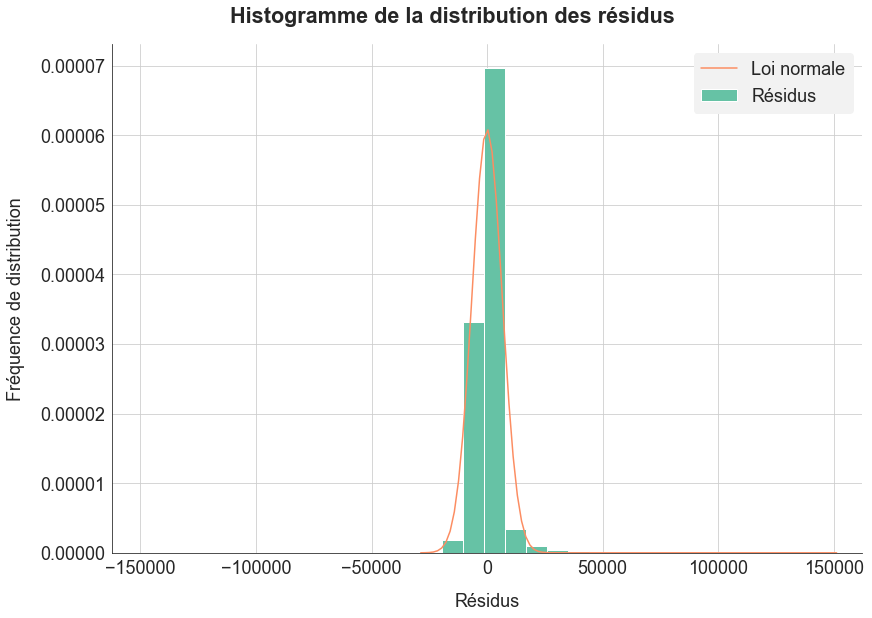

In [10]:
x_theo = np.arange(anova.resid.min(), anova.resid.max(), 0.01*(anova.resid.max()-anova.resid.min()))
mygraph = sfg.MyGraph("Histogramme de la distribution des résidus", is_mono=False)
mygraph.add_histogramme(anova.resid, bins=20, labels="Résidus")
mygraph.add_plot(x_theo, st.norm.pdf(x_theo, scale=anova.resid.std(ddof=1)), label="Loi normale", legend=True)
xmin, xmax = mygraph.ax[0].get_xlim()
absmax = max(-xmin, xmax)
mygraph.set_axe('y', label="Fréquence de distribution")
mygraph.set_axe('x', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova05b_01_distribution_residus.png")
plt.show()

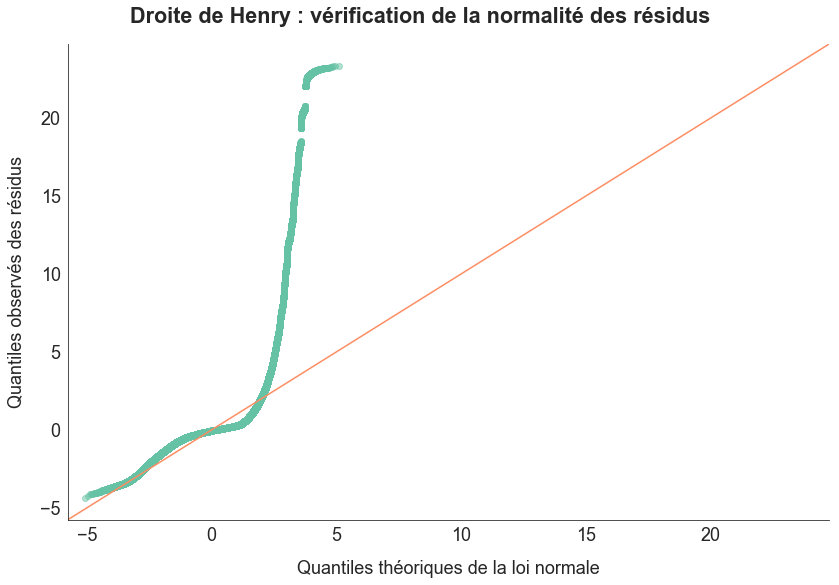

In [11]:
mygraph = sfg.MyGraph("Droite de Henry : vérification de la normalité des résidus", is_mono=False)
sm.qqplot(anova.resid, fit=True, markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], alpha=0.5, ax=mygraph.ax[0])
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="", color=mygraph.liste_couleurs[1])
mygraph.set_axe('x', label="Quantiles théoriques de la loi normale")
mygraph.set_axe('y', label="Quantiles observés des résidus")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova05b_02_droite_henry.png")
plt.show()

On remarque que les résidus ne sont pas normaux. Ils sont sur-représentés dans les valeurs élevées. Cela s'explique par la non-linéarité de la relation. La droite de Henry prend une forme assez proche d'une courbe exponentielle. De ce fait, étudier le logarithme des revenus devrait permettre de linéariser la relation et d'avoir un modèle plus pertinent.

**Hypothèse 2 : Linéarité et additivité de la relation  
Hypothèse 3 : Homoscédasticité des résidus**

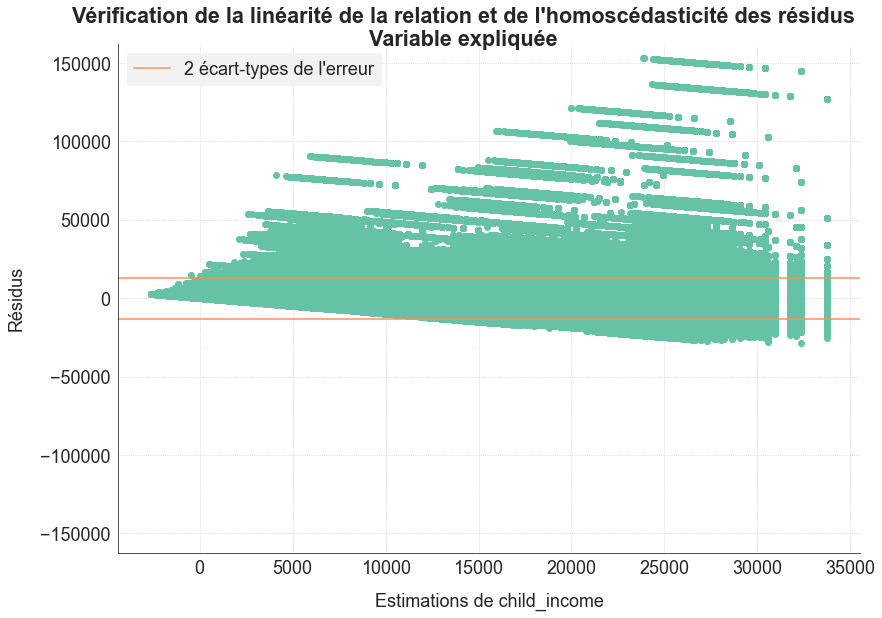

In [12]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation et de l'homoscédasticité des résidus\nVariable expliquée", is_mono=False)
mygraph.add_plot(anova.fittedvalues, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Estimations de child_income")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova05b_03_linearite_homoscedasticite_endo.png")
plt.show()

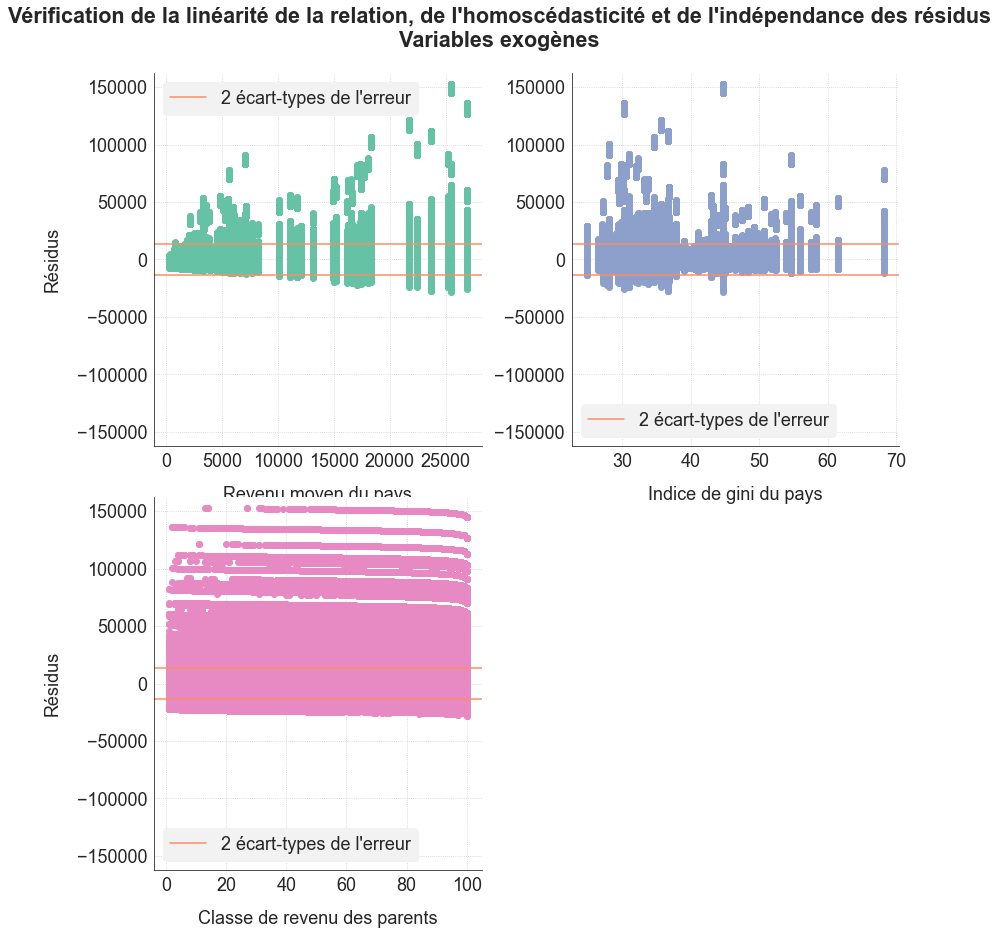

In [13]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation, de l'homoscédasticité et de l'indépendance des résidus\nVariables exogènes", nblin=2, nbcol=2, is_mono=False, figsize=(12,12))
mygraph.add_plot(data.revenu_moyen, anova.resid, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(data.gini_from_centiles, anova.resid, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(data.parent_centile, anova.resid, label="", marker='o', color=mygraph.liste_couleurs[3], linestyle='', with_grid='both', grid_style=":", multi_index=3)
#yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=1)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=1)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=2)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=2)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=3)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=3)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Revenu moyen du pays", multi_index=1)
mygraph.set_axe('x', label="Indice de gini du pays", multi_index=2)
mygraph.set_axe('x', label="Classe de revenu des parents", multi_index=3)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=1)
mygraph.set_axe('y', tick_min=-absmax, tick_max=absmax, multi_index=2)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=3)
mygraph.ax[3].set_visible(False)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova05b_04_linearite_homoscedasticite_exo.png")
plt.show()

In [14]:
alpha_homo = 0.05
lm_stat, lm_pvalue, f_stat, f_pvalue = sm.stats.diagnostic.het_breuschpagan(anova.resid, anova.model.exog)
if f_pvalue >= alpha_homo:
    test_result = ["Homoscédasticité acceptée"]
else:
    test_result = ["Homoscédasticité rejetée"]
pd.DataFrame({'H0':["Variance des résidus constante"], 'Statistique':["{:.2f}".format(f_stat)], \
             'p-value':["{:.3f}".format(f_pvalue)], 'Résultat (seuil={:.1%})'.format(alpha_homo):test_result}, index=["Breusch Pagan"])

,H0,Statistique,p-value,Résultat (seuil=5.0%)
Breusch Pagan,Variance des résidus constante,1862.77,0.000,Homoscédasticité rejetée


L'homoscédasticité est rejetée par le test. Les graphiques confirment les résultats du test, avec des résidus fortement décalés vers les valeurs positives élevées. L'hétéroscédasticité semble à nouveau découler de la non linéarité de la relation.

**Conclusion sur les hypothèses et sur le modèle**

Aucune des trois hypothèses n'est respectée. Il est inutile de pousser plus avant l'étude de ce modèle. Comme nous l'avons déjà vu précédemment, l'utilisation des valeurs du logarithme des revenus (revenu de l'enfant et revenu moyen du pays) devrait fournir un modèle plus pertinent et exploitable.